In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

# We will explore statistics looking at these packages
import pandas as pd
import seaborn as sn
import statsmodels.api as sm

### Datasets

We will look at two datasets. First the [Goddard Institute for Space Studies surface temperature analysis dataset from NASA](https://data.giss.nasa.gov/gistemp). There are many intersting products here; we will look at zonal mean temperature anomalies. The 'base' period that defines the mean is 1951 through 1980.

In [4]:
url = 'https://data.giss.nasa.gov/gistemp/tabledata_v3/ZonAnn.Ts+dSST.csv'
df_zonal = pd.read_csv(url, index_col=0, parse_dates=True)

# The `describe` method is a good way to get an idea of the statistical
# properties of a variable or dataset.
df_zonal['Glob'].describe()

count    137.000000
mean       0.025985
std        0.324288
min       -0.470000
25%       -0.200000
50%       -0.070000
75%        0.190000
max        0.980000
Name: Glob, dtype: float64

In [3]:
df_zonal

,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
Year,,,,,,,,,,,,,,
1880-01-01,-0.20,-0.33,-0.06,-0.41,-0.14,-0.06,-0.95,-0.62,-0.21,-0.22,-0.07,-0.02,-0.08,0.34
1881-01-01,-0.11,-0.19,-0.03,-0.30,0.00,-0.06,-0.67,-0.47,-0.13,-0.01,0.01,-0.06,-0.02,0.32
1882-01-01,-0.09,-0.17,-0.02,-0.23,-0.09,0.03,-1.37,-0.26,-0.01,-0.08,-0.09,0.03,0.08,0.37
1883-01-01,-0.20,-0.30,-0.09,-0.36,-0.21,-0.02,-0.34,-0.63,-0.18,-0.21,-0.20,-0.01,0.00,0.32
1884-01-01,-0.27,-0.41,-0.13,-0.56,-0.17,-0.12,-1.31,-0.62,-0.38,-0.18,-0.15,-0.14,-0.05,0.36
1885-01-01,-0.31,-0.41,-0.22,-0.59,-0.17,-0.20,-1.16,-0.71,-0.40,-0.11,-0.24,-0.27,-0.07,0.33
1886-01-01,-0.30,-0.39,-0.22,-0.48,-0.24,-0.20,-1.21,-0.46,-0.36,-0.23,-0.25,-0.17,-0.21,0.23
1887-01-01,-0.33,-0.36,-0.29,-0.46,-0.27,-0.27,-1.54,-0.56,-0.19,-0.21,-0.33,-0.24,-0.29,0.16
1888-01-01,-0.20,-0.22,-0.17,-0.42,0.08,-0.34,-1.40,-0.47,-0.20,0.09,0.06,-0.29,-0.38,0.11


In [5]:
df_zonal.describe()

,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,0.025985,0.052701,0.000073,0.069708,0.031971,-0.025182,0.075985,0.102628,0.033869,0.029854,0.034672,0.018029,-0.070803,-0.117518
std,0.324288,0.374762,0.295171,0.443739,0.319204,0.291414,0.881053,0.504323,0.332215,0.313287,0.333107,0.310445,0.260751,0.707656
min,-0.470000,-0.500000,-0.480000,-0.590000,-0.590000,-0.490000,-1.610000,-0.730000,-0.540000,-0.650000,-0.570000,-0.430000,-0.620000,-2.550000
25%,-0.200000,-0.210000,-0.220000,-0.260000,-0.210000,-0.260000,-0.530000,-0.270000,-0.180000,-0.210000,-0.220000,-0.230000,-0.270000,-0.480000
50%,-0.070000,-0.010000,-0.080000,0.010000,-0.030000,-0.110000,0.010000,0.010000,-0.050000,-0.010000,-0.030000,-0.090000,-0.090000,0.000000
75%,0.190000,0.170000,0.250000,0.230000,0.240000,0.230000,0.610000,0.360000,0.140000,0.210000,0.290000,0.260000,0.160000,0.340000
max,0.980000,1.250000,0.710000,1.480000,0.960000,0.580000,2.850000,1.460000,1.080000,0.940000,0.990000,0.750000,0.390000,1.270000


The second dataset will be [monthly mean temperature data for states](https://www1.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmpcst-v1.0.0-20170404) published by NOAA. The [README file for this dataset](https://www1.ncdc.noaa.gov/pub/data/cirs/climdiv/state-readme.txt) describes the mangled time, location, and category code in the first column. They also have a [wide range of data available](https://www1.ncdc.noaa.gov/pub/data/cirs/climdiv/).




In [7]:
# Region IDs according to the README file. A new first value 'null' has been
# added so that the index of the list will corresond to the code (i.e., 'Alabama' is 001)
# We will only deal with the contiguous 48, so other regions are ignored.
Region_ID = ['null', 'Alabama', 'Arizona', 'Arkansas', 'California', 
             'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho', 
             'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 
             'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 
             'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 
             'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 
             'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 
             'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 
             'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [32]:
import urllib.request # use this package to read html files as text

url = 'https://www1.ncdc.noaa.gov/pub/data/cirs/climdiv/climdiv-tmpcst-v1.0.0-20170404'
with urllib.request.urlopen(url) as f:
   html = f.read()  # the entire file as a single string

lines = html.split(b'\n')  # split into lines. The 'b' is needed since the 'string' is actually
                           # defined as a 'bytes' object, that could contain special characters


In [33]:
times = {state:[] for state in Region_ID}
monthly_temp = {state:[] for state in Region_ID}

for line in lines:
    data = line.split()
    if not data: 
        continue
    
    # First parse the first element into state, division, element, and year according 
    # to the README file
    state_code = int(data[0][:3])
    if state_code > 48:  
        continue # ignore regions outside the contiguous 48.
    state = Region_ID[state_code]
    division = int(data[0][3])  # Zero for area-averaged element. We won't use this
    element = int(data[0][4:6]) # Should all be 02 (average temperature) for this dataset
    year = int(data[0][6:])
    
    monthly_temp[state] += [float(temp) for temp in data[1:]]
    times[state] += [datetime(year, month, 15) for month in range(1, 13)]

dfs = [pd.DataFrame(monthly_temp[state], index=times[state], columns=[state])
       for state in Region_ID]

df_states = pd.concat(dfs[1:], axis=1) # concatinate and remove the 'null' state
df_states[df_states == -99.9] = np.nan

# Remove 1951 - 1980 mean to get anomalies similar to GISS data.
df_states -= df_states['1951':'1980'].mean()


In [34]:
df_states

,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Idaho,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1895-01-15,-19.417222,-18.876111,-23.9925,-16.913333,-23.001944,-25.381111,-23.037222,-12.364722,-18.031389,-22.516944,...,-37.505556,-23.211944,-19.858889,-24.768611,-26.4425,-23.437222,-19.864167,-24.651944,-34.793889,-26.373333
1895-02-15,-25.117222,-15.776111,-27.0925,-11.413333,-25.401944,-29.481111,-29.937222,-19.264722,-24.431389,-18.916944,...,-32.305556,-27.911944,-25.958889,-22.768611,-29.8425,-29.037222,-11.364167,-29.651944,-33.193889,-26.273333
1895-03-15,-8.017222,-9.176111,-8.8925,-9.613333,-12.901944,-16.681111,-14.637222,-6.364722,-7.931389,-12.016944,...,-15.405556,-10.211944,-8.058889,-12.868611,-19.1425,-11.937222,-8.364167,-12.251944,-16.393889,-15.473333
1895-04-15,0.882778,-0.976111,2.1075,-3.713333,-0.101944,-3.681111,-3.037222,-2.064722,-0.331389,0.883056,...,7.194444,1.088056,0.341111,-0.568611,-1.9425,-1.337222,-0.464167,0.348056,4.206111,1.226667
1895-05-15,6.982778,6.523889,8.2075,3.886667,6.998056,9.618889,6.562778,4.835278,6.468611,6.083056,...,11.094444,7.488056,5.241111,6.931389,14.1575,6.962778,4.335833,8.848056,14.106111,6.026667
1895-06-15,14.982778,12.323889,16.6075,11.186667,13.898056,19.318889,18.062778,9.435278,15.068611,11.983056,...,17.694444,18.288056,13.541111,13.731389,23.4575,18.062778,11.735833,19.348056,24.106111,12.426667
1895-07-15,16.682778,19.023889,18.6075,14.986667,18.698056,18.218889,17.762778,10.835278,15.868611,20.283056,...,25.394444,18.088056,15.841111,21.231389,21.5575,17.662778,15.935833,18.048056,24.606111,20.426667
1895-08-15,16.982778,18.523889,18.7075,14.886667,20.298056,20.518889,21.462778,11.035278,16.468611,21.183056,...,24.594444,18.788056,16.941111,21.831389,20.5575,19.962778,16.235833,20.848056,25.106111,21.526667
1895-09-15,15.282778,12.223889,16.3075,8.286667,14.198056,15.218889,16.362778,9.435278,13.968611,8.483056,...,16.894444,16.388056,12.641111,12.031389,15.2575,16.862778,4.935833,17.348056,19.906111,11.726667
1895-10-15,-2.817222,1.923889,-4.3925,2.586667,0.498056,-3.181111,-3.137222,0.435278,-1.431389,3.183056,...,-0.905556,-4.711944,-2.758889,0.431389,-2.0425,-3.537222,1.535833,-4.251944,-2.293889,0.726667


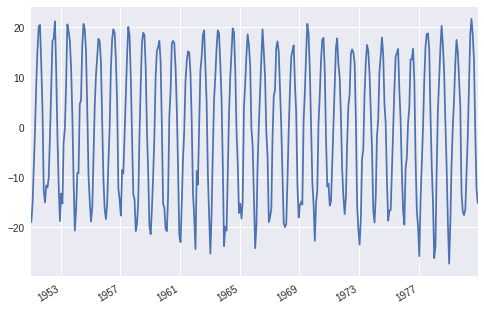

In [35]:
df_states['Texas']['1951':'1980'].plot()

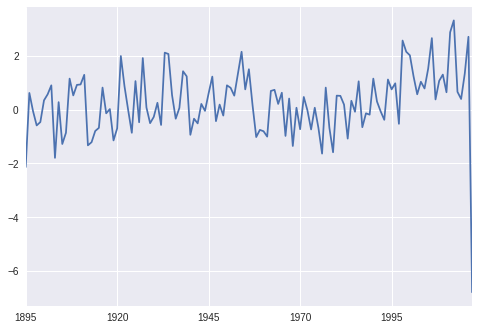

In [36]:
df_states.resample('AS').mean()['Texas'].plot()

In [37]:
df = pd.concat([df_zonal, df_states.resample('AS').mean()['Texas']], axis=1).dropna()

In [15]:
df.describe()

,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S,Texas
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,0.058607,0.097131,0.020984,0.126311,0.058525,-0.008852,0.223033,0.169590,0.064590,0.055902,0.061885,0.035164,-0.057295,-0.152623,0.323010
std,0.327970,0.372418,0.304602,0.436466,0.324694,0.302849,0.813104,0.491238,0.337492,0.317742,0.339100,0.322947,0.268590,0.740347,1.056474
min,-0.470000,-0.500000,-0.480000,-0.570000,-0.590000,-0.490000,-1.610000,-0.730000,-0.540000,-0.650000,-0.570000,-0.430000,-0.620000,-2.550000,-2.133889
25%,-0.187500,-0.167500,-0.220000,-0.170000,-0.200000,-0.277500,-0.335000,-0.157500,-0.130000,-0.190000,-0.190000,-0.237500,-0.245000,-0.567500,-0.492222
50%,-0.020000,0.035000,-0.065000,0.065000,0.020000,-0.095000,0.125000,0.065000,-0.020000,0.035000,0.010000,-0.080000,-0.075000,-0.010000,0.320278
75%,0.265000,0.250000,0.277500,0.317500,0.282500,0.250000,0.667500,0.387500,0.167500,0.252500,0.312500,0.290000,0.190000,0.340000,0.936944
max,0.980000,1.250000,0.710000,1.480000,0.960000,0.580000,2.850000,1.460000,1.080000,0.940000,0.990000,0.750000,0.390000,1.270000,3.324444


In [16]:
# We can quickly calculate a correlation matrix between all the columns
df.corr()

,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S,Texas
Glob,1.000000,0.975517,0.963644,0.935436,0.947599,0.912153,0.824861,0.890983,0.917213,0.934765,0.939024,0.944705,0.782213,0.491374,0.366355
NHem,0.975517,1.000000,0.881598,0.980091,0.908790,0.815613,0.877802,0.934521,0.950878,0.915667,0.882181,0.875729,0.658797,0.402197,0.428655
SHem,0.963644,0.881598,1.000000,0.818097,0.935815,0.966161,0.704238,0.777761,0.815276,0.899446,0.950137,0.965006,0.876082,0.562960,0.262310
24N-90N,0.935436,0.980091,0.818097,1.000000,0.813556,0.779740,0.911440,0.959961,0.953353,0.817847,0.790858,0.845237,0.608663,0.377788,0.486877
24S-24N,0.947599,0.908790,0.935815,0.813556,1.000000,0.821486,0.693170,0.770717,0.818276,0.988717,0.989776,0.857811,0.720218,0.418141,0.235556
90S-24S,0.912153,0.815613,0.966161,0.779740,0.821486,1.000000,0.679553,0.736778,0.775128,0.784722,0.837899,0.972941,0.918933,0.635731,0.287451
64N-90N,0.824861,0.877802,0.704238,0.911440,0.693170,0.679553,1.000000,0.830752,0.790121,0.700286,0.668809,0.729404,0.526732,0.293047,0.447521
44N-64N,0.890983,0.934521,0.777761,0.959961,0.770717,0.736778,0.830752,1.000000,0.876222,0.766224,0.757346,0.799065,0.575175,0.368080,0.401001
24N-44N,0.917213,0.950878,0.815276,0.953353,0.818276,0.775128,0.790121,0.876222,1.000000,0.827706,0.791810,0.844759,0.609620,0.387811,0.518752
EQU-24N,0.934765,0.915667,0.899446,0.817847,0.988717,0.784722,0.700286,0.766224,0.827706,1.000000,0.957501,0.826890,0.676261,0.400921,0.257518


We are now ready to start doing some statistics. Fitting a model in statsmodels typically involves 3 easy steps:

1. Use the model class to describe the model
2. Fit the model using a class method
3. Inspect the results using a summary method


In [17]:
# 1. Describe the model
mod = sm.OLS(df['Texas'], df.drop('Texas', axis=1))   # Ordinary Least Squares

# 2. Fit the model
res = mod.fit()

# 3. Summarize the model fit
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Texas   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     6.545
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           2.10e-09
Time:                        10:27:42   Log-Likelihood:                -147.33
No. Observations:                 122   AIC:                             322.7
Df Residuals:                     108   BIC:                             361.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Glob          39.6494     26.754      1.482      0.141       -13.382    92.681
NHem          10.4157     23.999      0.434      0.665       -37.154    57.985
SHem           5.0687     19.720      0.257      0.798       -34.019    44.157
24N-90N        5.5436     15.300      0.362      0.718       -24.784    35.871
24S-24N        3.9676     21.881      0.181      0.856       -39.404    47.339
90S-24S      -14.1363     13.191     -1.072      0.286       -40.284    12.011
64N-90N       -3.2933      1.928     -1.708      0.091        -7.115     0.529
44N-64N       -8.1399      4.102     -1.984      0.050       -16.271    -0.009
24N-44N       -9.1017      6.488     -1.403      0.164       -21.961     3.758
EQU-24N      -15.4135     14.561     -1.059      0.292       -44.275    13.448
24S-EQU      -12.4807     13.499     -0.925      0.357       -39.237    14.276
44S-24S       -0.3458      1.751     -0.197      0.844        -3.817     3.126
64S-44S       -0.9190      0.998     -0.921      0.359        -2.897     1.059
90S-64S       -0.0188      0.177     -0.106      0.916        -0.369     0.331
==============================================================================
Omnibus:                        1.777   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.411   Jarque-Bera (JB):                1.487
Skew:                           0.110   Prob(JB):                        0.475
Kurtosis:                       2.506   Cond. No.                         529.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
res.pvalues  # lower is better. Significant usually for p < 0.05

Glob       0.141256
NHem       0.665145
SHem       0.797638
24N-90N    0.717821
24S-24N    0.856450
90S-24S    0.286272
64N-90N    0.090527
44N-64N    0.049765
24N-44N    0.163502
EQU-24N    0.292158
24S-EQU    0.357239
44S-24S    0.843875
64S-44S    0.359064
90S-64S    0.915527
dtype: float64

### Visualizing datasets

We can use seaborn to visulize joint dataset distributions

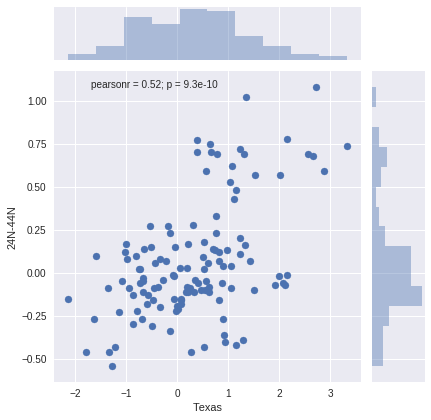

In [19]:
sn.jointplot(df['Texas'], df['24N-44N'])

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


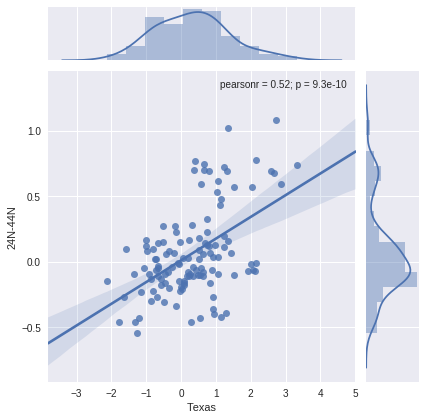

In [23]:
# Seaborn also plays nice with pandas -- you can provide the dataframe as 'data'
# and then just reference the columns.
# Excercise -- Try kind as 'reg', 'kde', and 'hex'
sn.jointplot('Texas', '24N-44N', data=df, kind='reg')

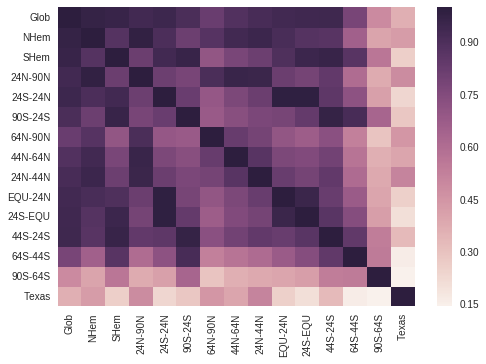

In [24]:
# We can quicly visualize a 'heatmap' of the correlation coefficients.
sn.heatmap(df.corr())

/opt/anaconda3/lib/python3.5/site-packages/seaborn/categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


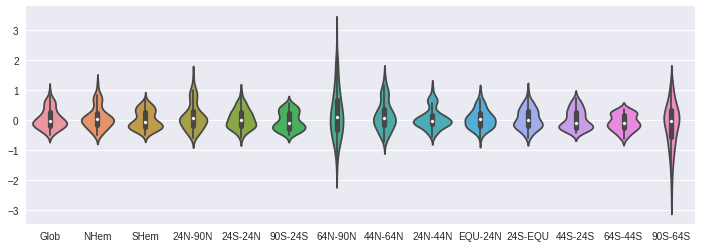

In [38]:
fig = plt.figure(figsize=(12, 4))
# sn.boxplot(df)
sn.violinplot(df.drop('Texas', axis=1))

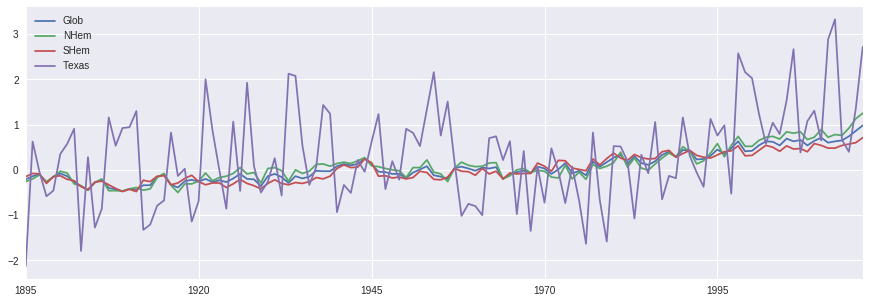

In [26]:
df[['Glob', 'NHem', 'SHem', 'Texas']].plot(figsize=(15, 5))

In [27]:
import statsmodels.formula.api as smf

model = smf.ols(formula="Texas ~ NHem + SHem", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Texas   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     19.17
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           6.05e-08
Time:                        10:39:52   Log-Likelihood:                -162.27
No. Observations:                 122   AIC:                             330.5
Df Residuals:                     119   BIC:                             339.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1166      0.091      1.277      0.204        -0.064     0.297
NHem           2.5136      0.479      5.246      0.000         1.565     3.462
SHem          -1.7995      0.586     -3.072      0.003        -2.959    -0.640
==============================================================================
Omnibus:                        6.713   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                3.605
Skew:                           0.196   Prob(JB):                        0.165
Kurtosis:                       2.254   Cond. No.                         8.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df['year'] = df.index.year
model = smf.ols(formula="Glob ~ year", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Glob   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     442.6
Date:                Tue, 11 Apr 2017   Prob (F-statistic):           4.47e-42
Time:                        10:42:00   Log-Likelihood:                 57.654
No. Observations:                 122   AIC:                            -111.3
Df Residuals:                     120   BIC:                            -105.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -16.0278      0.765    -20.959      0.000       -17.542   -14.514
year           0.0082      0.000     21.039      0.000         0.007     0.009
==============================================================================
Omnibus:                        1.182   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.554   Jarque-Bera (JB):                1.252
Skew:                           0.223   Prob(JB):                        0.535
Kurtosis:                       2.784   Cond. No.                     1.09e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
sm.stats.anova_lm(model)

/opt/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/anaconda3/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
year,1.0,10.239312,10.239312,442.629368,4.467934e-42
Residual,120.0,2.775951,0.023133,NaN,NaN
